## Preparation

In [1]:
# !pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download julnazz/diabetes-health-indicators-dataset

Dataset URL: https://www.kaggle.com/datasets/julnazz/diabetes-health-indicators-dataset
License(s): CC0-1.0
 94% 5.00M/5.30M [00:00<00:00, 16.8MB/s]
100% 5.30M/5.30M [00:00<00:00, 17.7MB/s]


In [3]:
!unzip diabetes-health-indicators-dataset.zip

Archive:  diabetes-health-indicators-dataset.zip
  inflating: diabetes_012_health_indicators_BRFSS2021.csv  
  inflating: diabetes_binary_5050split_health_indicators_BRFSS2021.csv  
  inflating: diabetes_binary_health_indicators_BRFSS2021.csv  


In [4]:
# Import Package yang dibutuhkan
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
!pip install catboost --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.0 MB/s eta 0:00:00


## Dataset Information

Deskripsi dataset (biasanya di kaggle suka dikasih, di perlombaan juga suka ada)
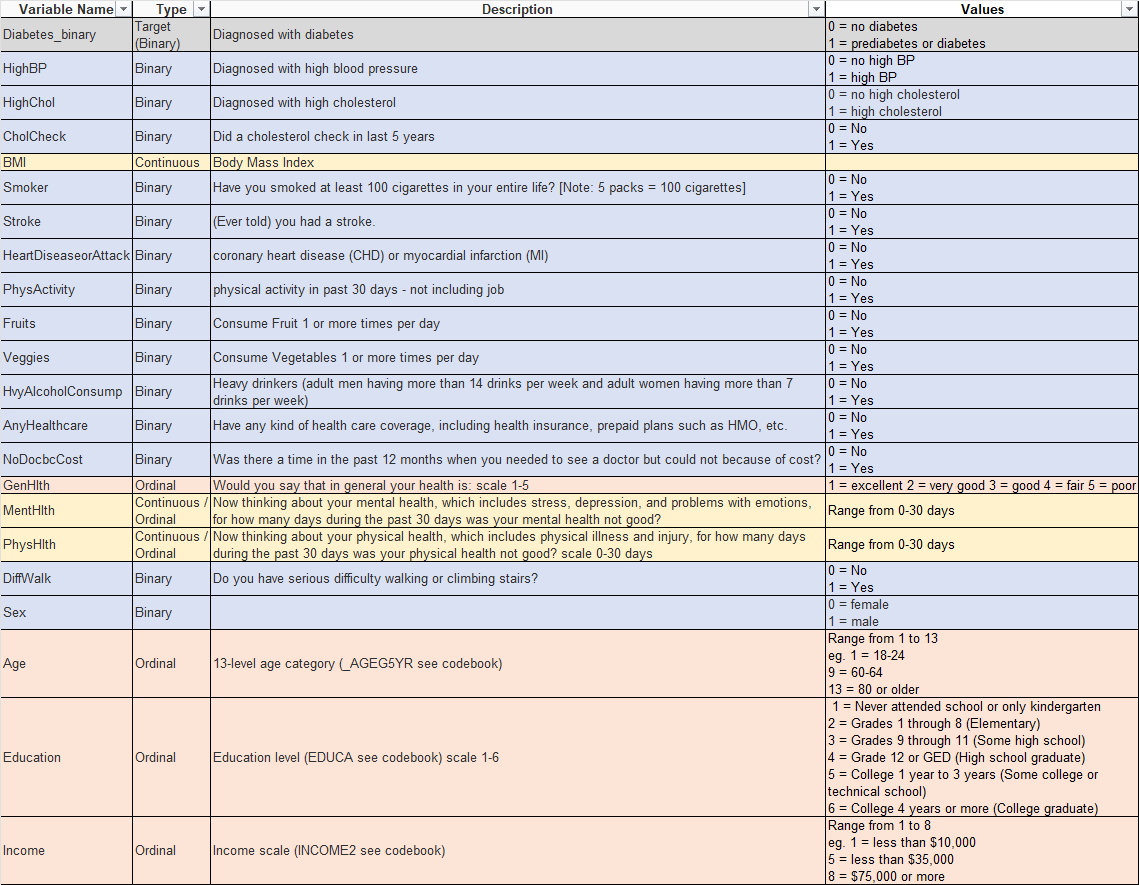

In [6]:
df = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2021.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [7]:
df.shape

(236378, 22)

In [8]:
df.dtypes

Diabetes_binary         float64
HighBP                    int64
HighChol                float64
CholCheck                 int64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity              int64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump         int64
AnyHealthcare             int64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                       int64
Age                       int64
Education               float64
Income                  float64
dtype: object

Terlihat bahwa semua data merupakan tipe data float sehingga tidak diperlukan encoding lagi untuk kedepannya. Tapi kurang pas aja karena datanya bukan floating number kebanyakan bilangan bulat (bahkan BMI pun begitu)

In [7]:
def float_to_int(col):
    if col.dtype == 'float64':
        return col.astype(int)
    else:
        return col

# Apply the conversion function to relevant columns
df = df.apply(float_to_int)

print("DataFrame with float columns converted to integer:")
df

DataFrame with float columns converted to integer:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,15,1,0,0,0,1,...,1,0,5,10,20,0,0,11,4,5
1,1,1,0,1,28,0,0,1,0,1,...,1,0,2,0,0,0,0,11,4,3
2,1,1,1,1,33,0,0,0,1,1,...,1,0,2,10,0,0,0,9,4,7
3,1,0,1,1,29,0,1,1,1,1,...,1,0,5,0,30,1,1,12,3,4
4,0,0,0,1,24,1,0,0,0,0,...,1,0,3,0,0,1,1,13,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,1,1,1,1,21,0,0,0,1,1,...,1,0,4,0,0,0,1,10,2,3
236374,0,1,0,1,25,1,0,0,1,1,...,0,1,2,20,0,0,0,3,4,5
236375,0,0,1,1,31,0,0,0,1,1,...,1,0,2,0,0,0,1,7,6,10
236376,0,1,0,1,24,0,0,0,1,1,...,1,0,2,0,0,0,1,10,4,6


## Data Exploration

### Duplicates

In [8]:
df[df.duplicated()]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1245,0,0,0,1,27,1,0,0,1,1,...,1,0,2,0,0,0,0,5,5,9
2596,0,0,0,1,29,0,0,0,1,0,...,1,0,1,0,0,0,1,4,5,8
3055,0,0,0,1,31,1,0,0,1,1,...,1,0,2,0,0,0,0,10,5,5
3895,0,0,0,1,28,0,0,0,1,1,...,1,0,2,0,0,0,1,4,5,9
3937,0,0,0,1,22,0,0,0,1,1,...,1,0,1,0,0,0,0,9,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236322,0,0,0,1,25,0,0,0,1,1,...,1,0,3,0,0,0,1,11,4,3
236323,0,1,0,1,31,0,0,0,1,1,...,1,0,2,0,0,0,0,11,6,6
236327,0,0,0,1,25,0,0,0,1,1,...,1,0,1,0,0,0,0,7,5,10
236354,0,1,0,1,25,1,0,0,1,1,...,1,0,2,0,0,0,0,10,6,7


Handling data duplikat dengan menghapus row yang duplikat

In [9]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(223243, 22)

### Null

In [10]:
df.isnull().sum()/len(df)*100

Diabetes_binary         0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

Data sudah bersih saatnya ke step selanjutnya

### Unique Value

In [11]:
binary = []
for col in df.columns:
    print(col, ':', len(df[col].unique()), 'labels')
    if len(df[col].unique()) == 2 and col != 'Diabetes_binary':
      binary.append(col)

print(binary)

Diabetes_binary : 2 labels
HighBP : 2 labels
HighChol : 2 labels
CholCheck : 2 labels
BMI : 84 labels
Smoker : 2 labels
Stroke : 2 labels
HeartDiseaseorAttack : 2 labels
PhysActivity : 2 labels
Fruits : 2 labels
Veggies : 2 labels
HvyAlcoholConsump : 2 labels
AnyHealthcare : 2 labels
NoDocbcCost : 2 labels
GenHlth : 5 labels
MentHlth : 31 labels
PhysHlth : 31 labels
DiffWalk : 2 labels
Sex : 2 labels
Age : 13 labels
Education : 6 labels
Income : 11 labels
['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']


### Klasifikasi fitur
Bagi jadi binary category (di atas sudah), ordinal, dan kontinyu.

In [14]:
ordinal = ['Age', 'Education', 'Income', 'GenHlth']
cont = ['BMI', 'PhysHlth', 'MentHlth']

### Descriptive Statistics

In [15]:
df[cont].describe()

,BMI,PhysHlth,MentHlth
count,223243.000000,223243.000000,223243.000000
mean,29.134414,3.969688,4.159127
std,6.646068,8.432426,8.055095
min,12.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000
75%,32.000000,3.000000,4.000000
max,99.000000,30.000000,30.000000


Aneh ya BMI maksimalnya 99 mungkinkah kesalahan? Keliatan juga sih dari statistiknya kalau dia skewed to the right.

## EDA

### Target Data Distribution

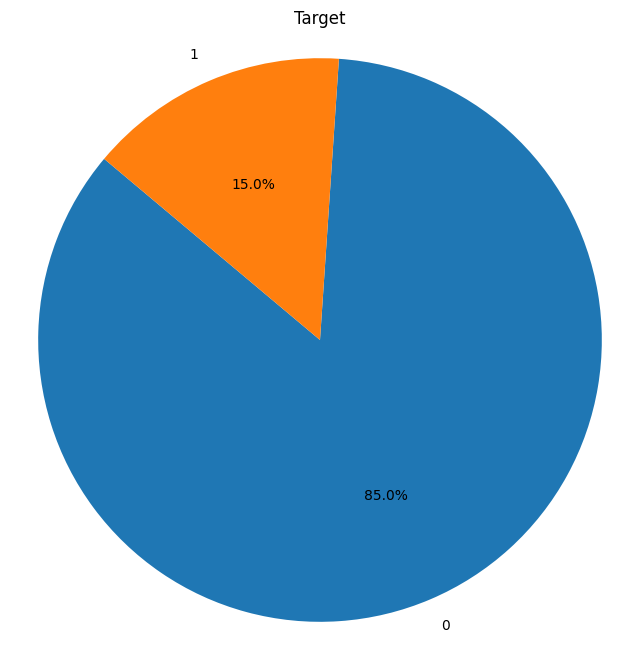

In [16]:
# Million dollars question: is the data imbalanced?
diabetes_count = df['Diabetes_binary'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(diabetes_count, labels=diabetes_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Target')
plt.axis('equal')
plt.show()

### Feature Distribution

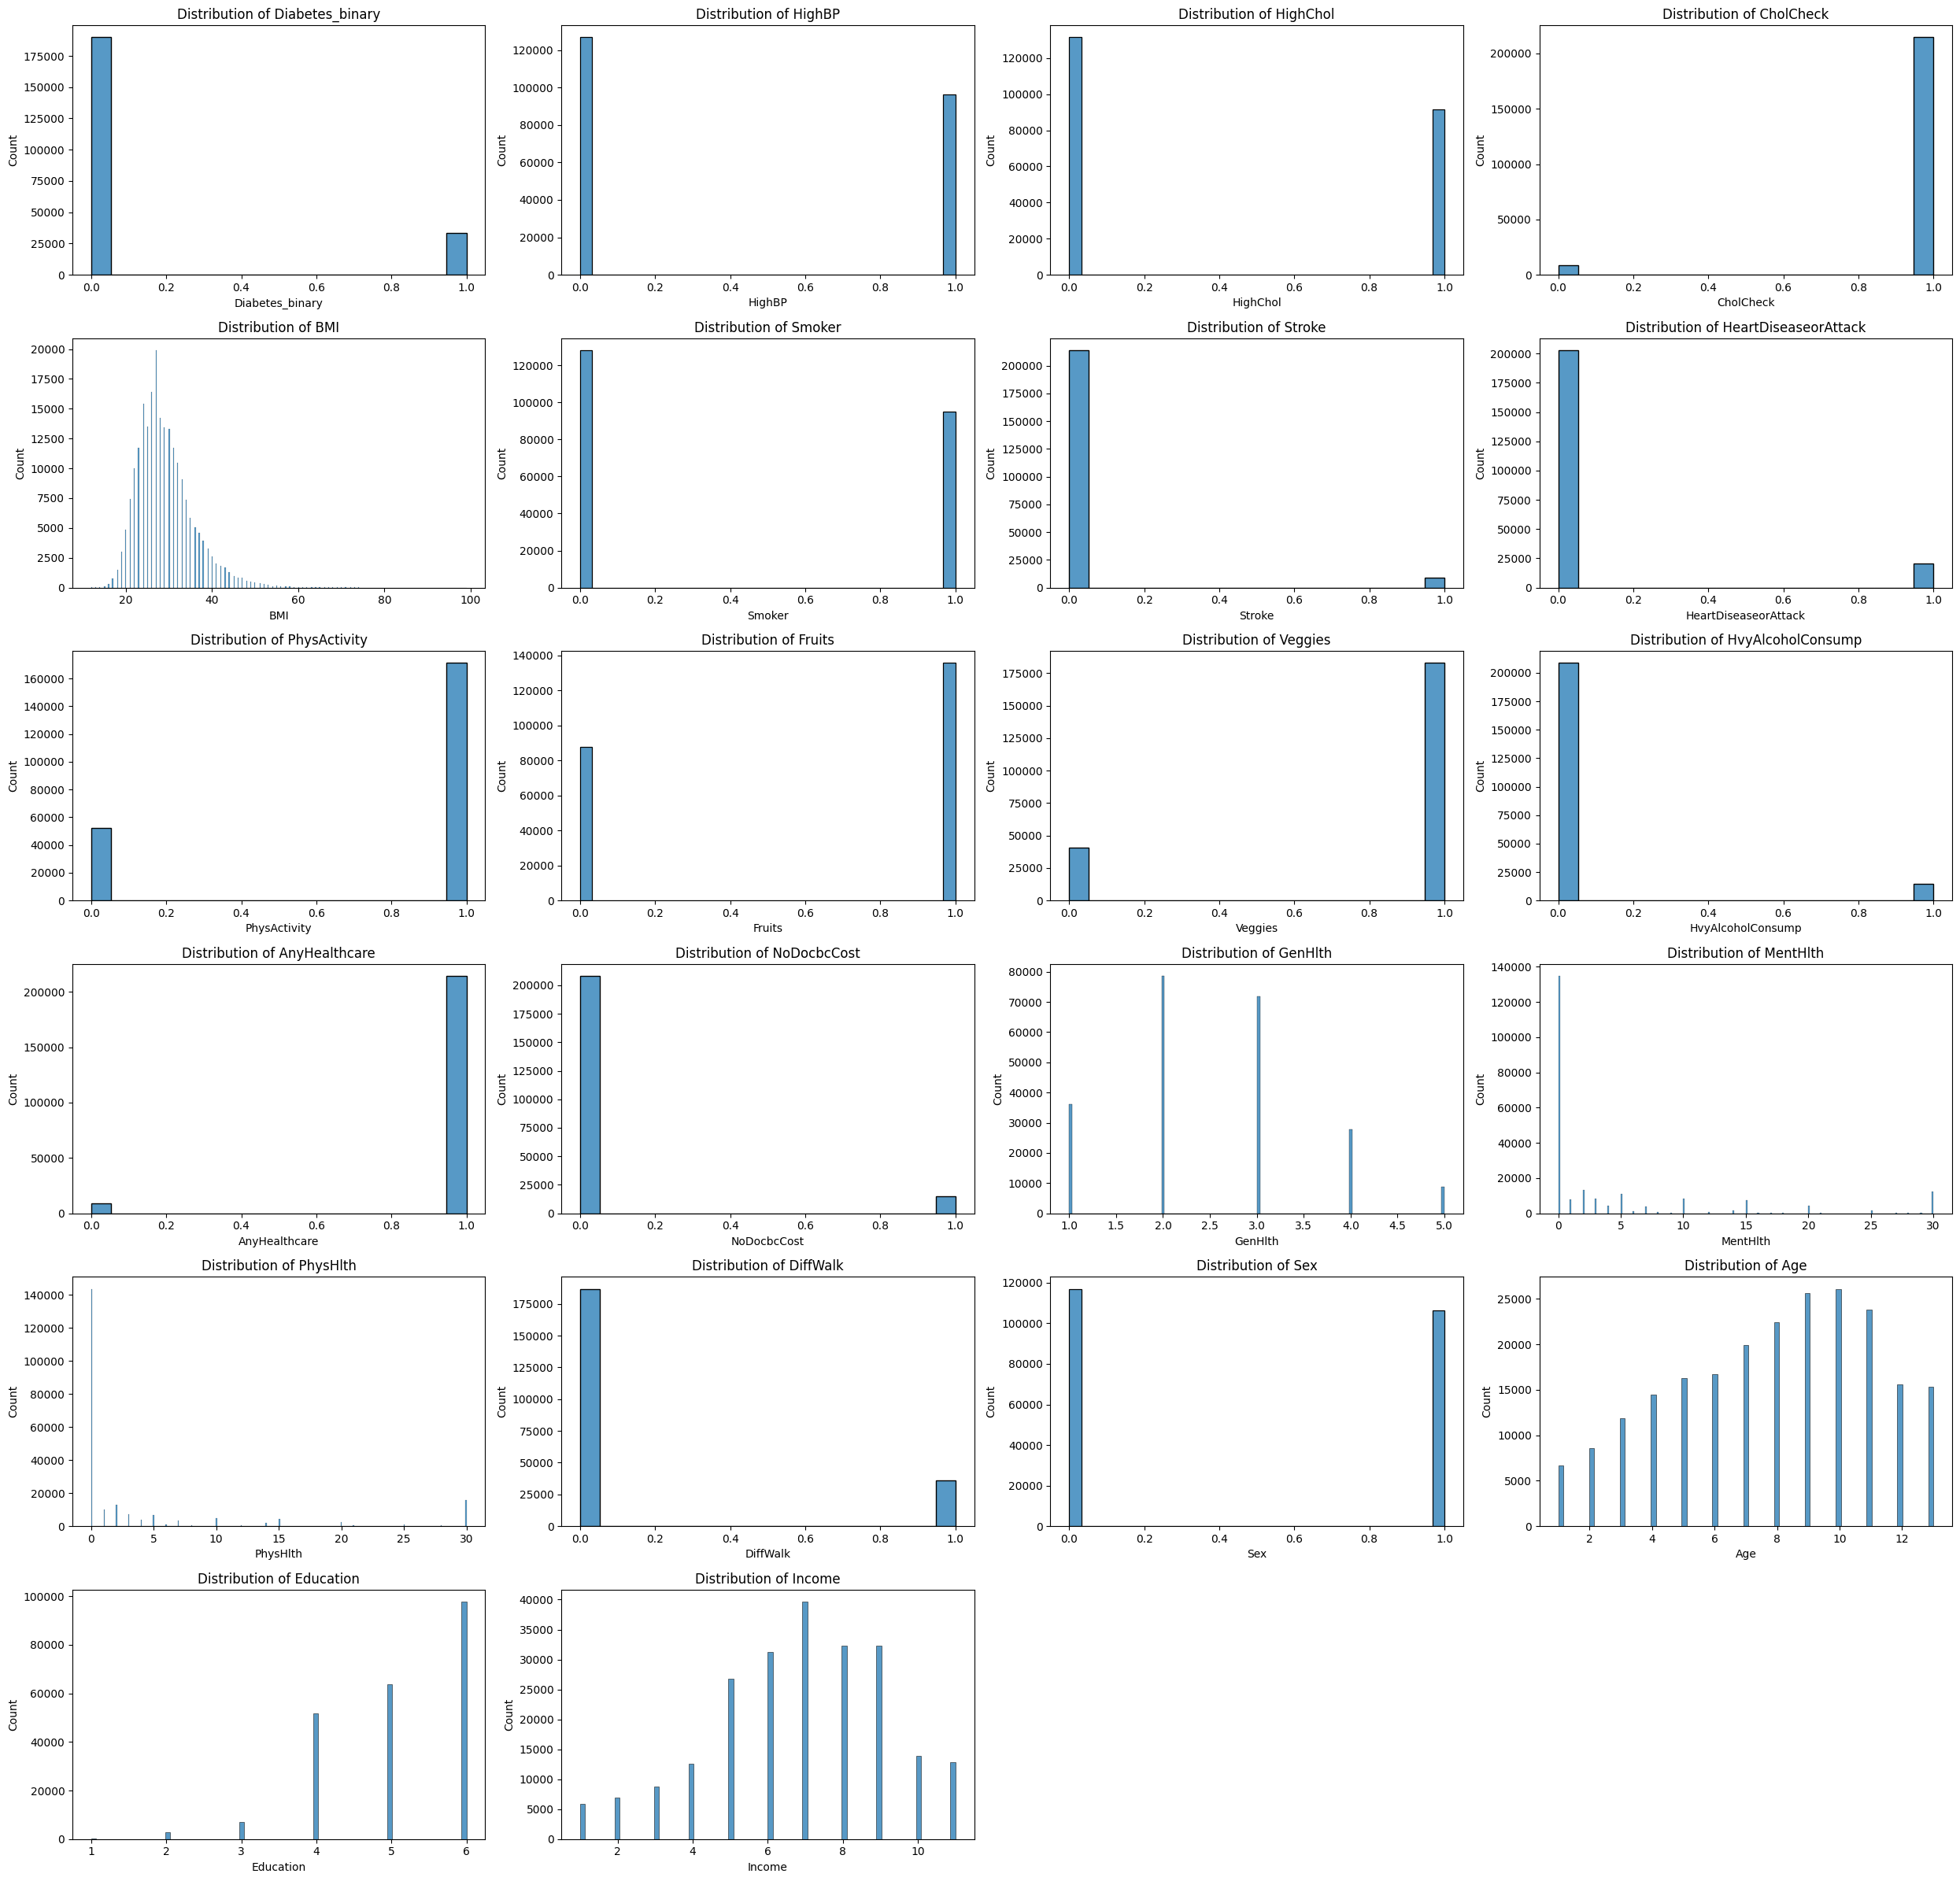

In [ ]:
def create_hist_plot(df):
  df_numerical = df.select_dtypes(include=[np.number, bool])
  numerical_columns = df_numerical.columns

  # Define the number of rows and columns you want for your subplots
  num_columns = len(df_numerical.columns)
  num_rows = int(np.ceil(num_columns / 4))

  # Create a figure object and define the size
  plt.figure(figsize=(25, 4 * num_rows))

  # Loop through the numerical columns and create a subplot for each
  for i, column in enumerate(df_numerical.columns):
      plt.subplot(num_rows, 4, i + 1)
      sns.histplot(data=df_numerical[column])
      plt.title(f"Distribution of {column}")

  # Adjust layout for better spacing between plots
  plt.tight_layout()
  plt.show()

create_hist_plot(df)

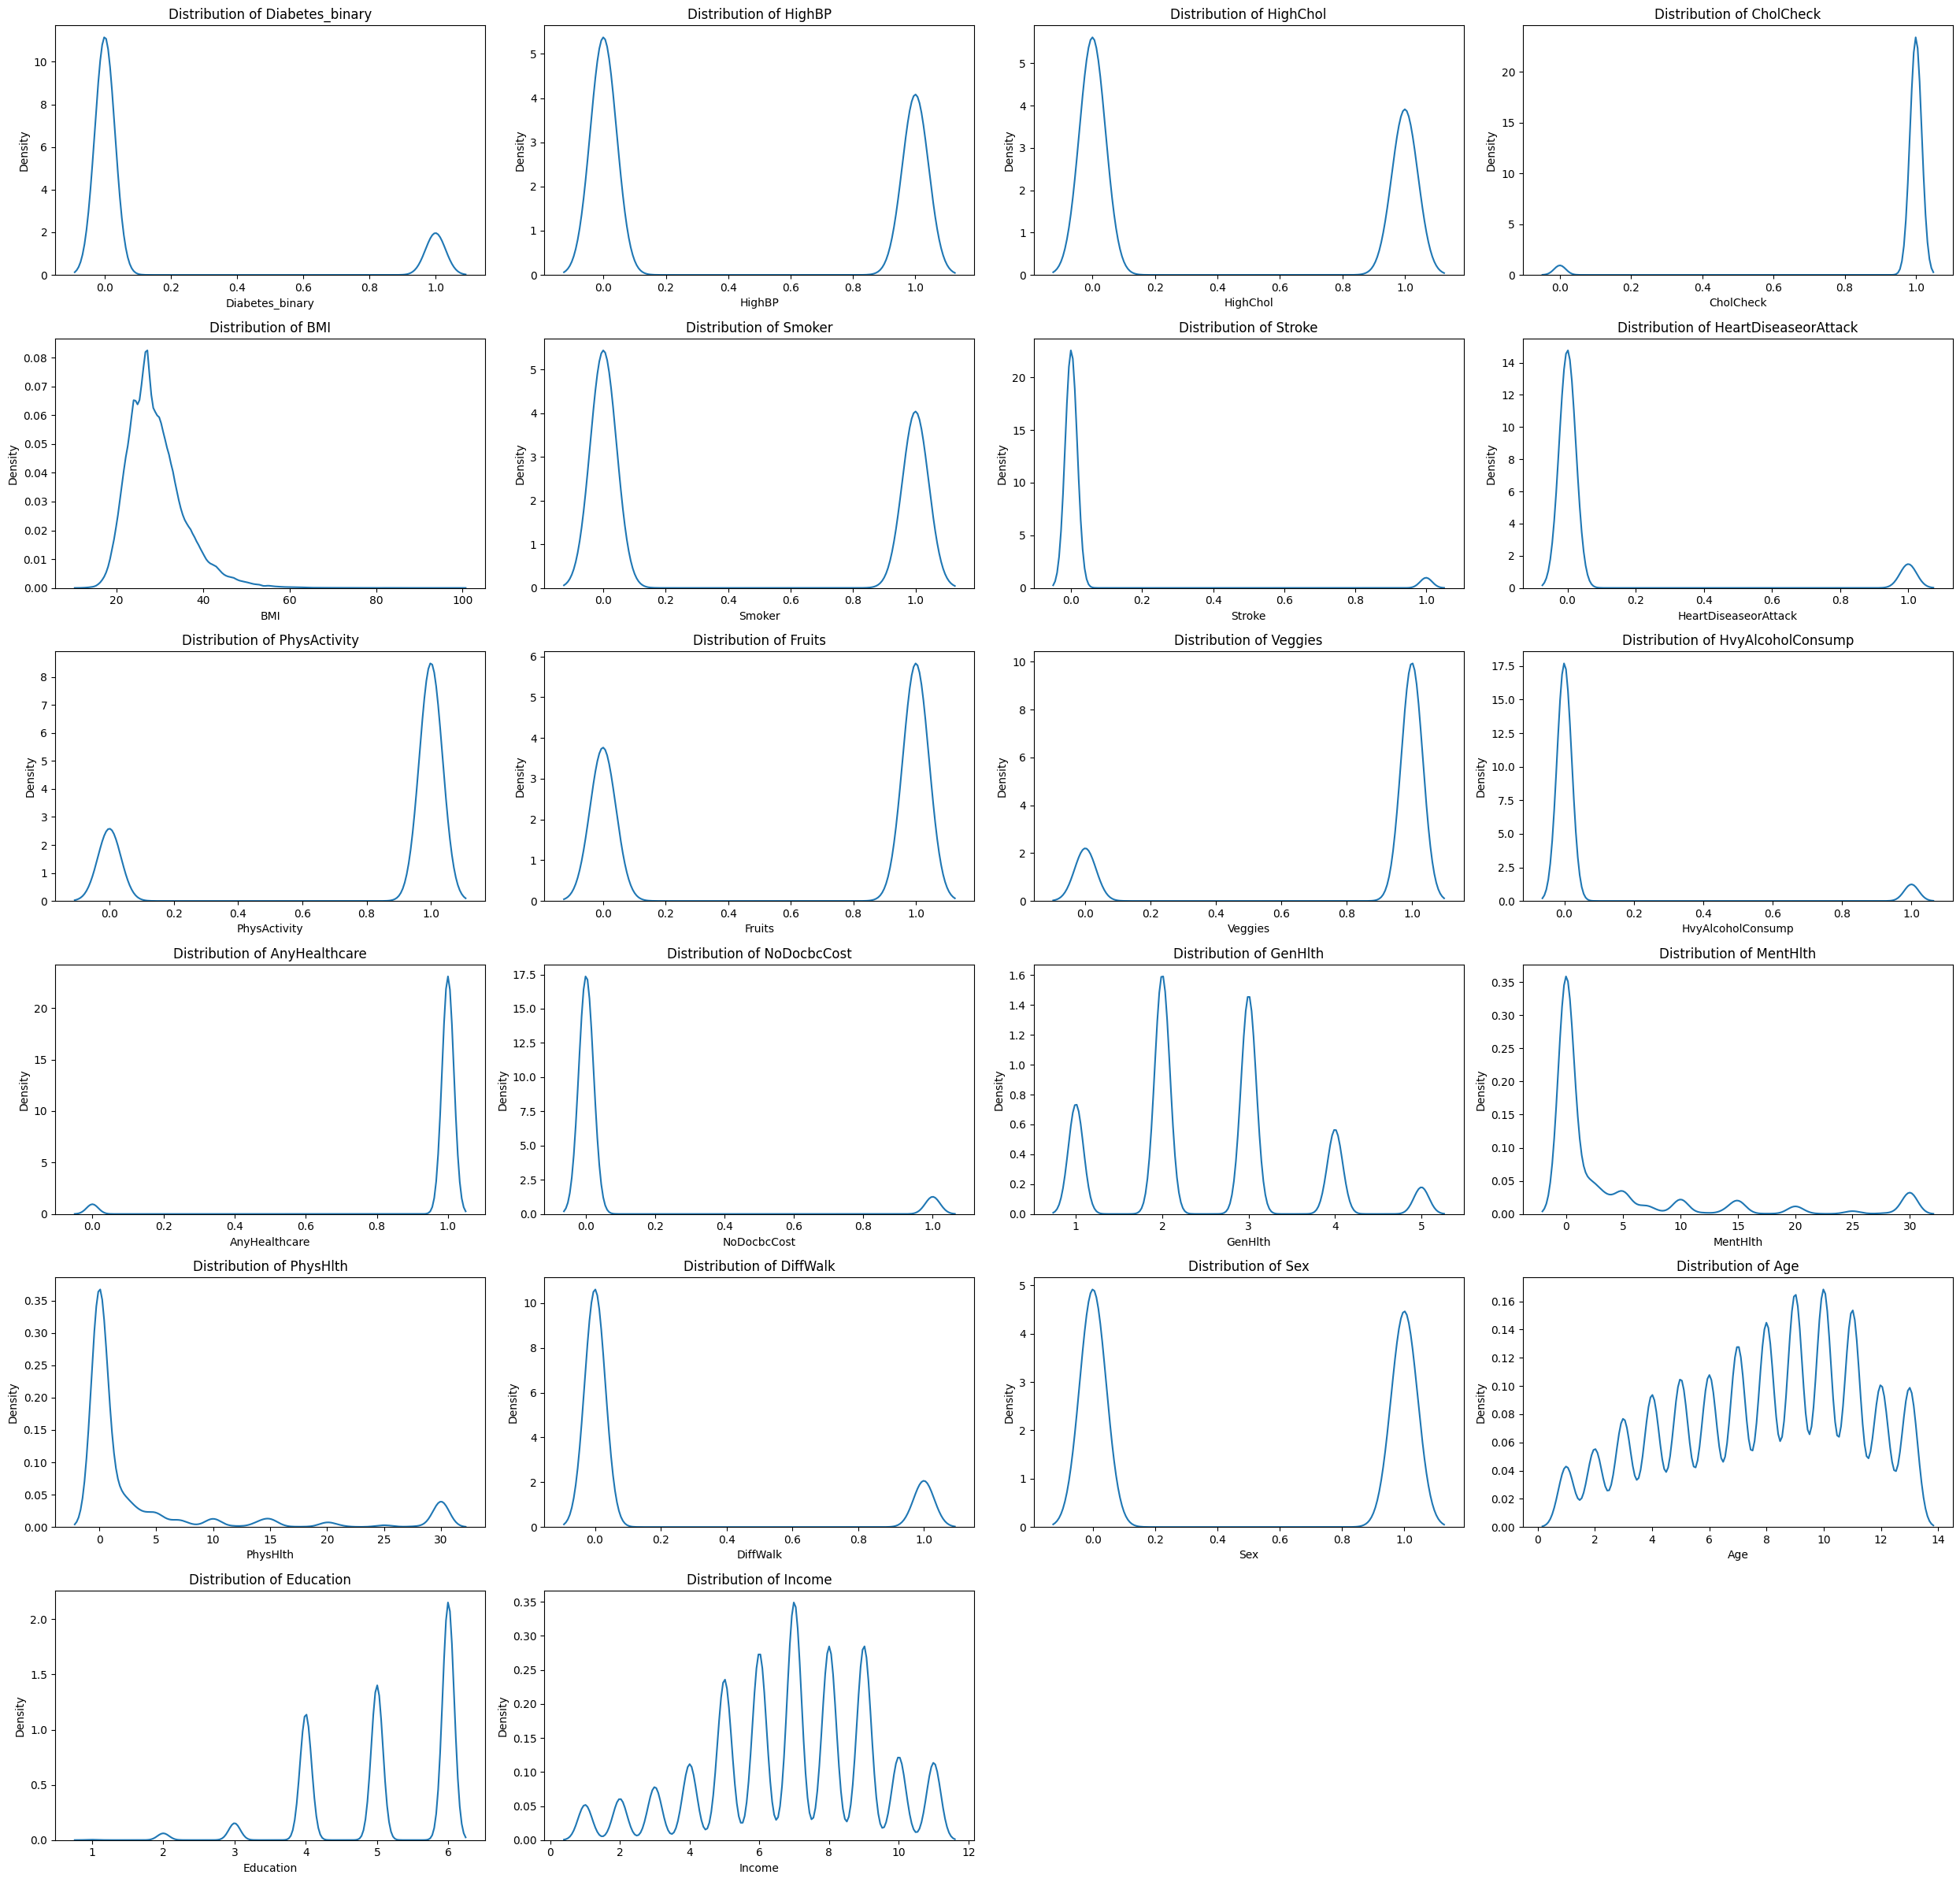

In [ ]:
def create_kde_plot(df):
  df_numerical = df.select_dtypes(include=[np.number, bool])
  numerical_columns = df_numerical.columns

  # Define the number of rows and columns you want for your subplots
  num_columns = len(df_numerical.columns)
  num_rows = int(np.ceil(num_columns / 4))

  # Create a figure object and define the size
  plt.figure(figsize=(25, 4 * num_rows))

  # Loop through the numerical columns and create a subplot for each
  for i, column in enumerate(df_numerical.columns):
      plt.subplot(num_rows, 4, i + 1)
      sns.kdeplot(data=df_numerical[column])
      plt.title(f"Distribution of {column}")

  # Adjust layout for better spacing between plots
  plt.tight_layout()
  plt.show()

create_kde_plot(df)

In [ ]:
df.skew()

Diabetes_binary         1.964912
HighBP                  0.276027
HighChol                0.362567
CholCheck              -4.793829
BMI                     1.319863
Smoker                  0.298419
Stroke                  4.618430
HeartDiseaseorAttack    2.840501
PhysActivity           -1.262289
Fruits                 -0.440913
Veggies                -1.655075
HvyAlcoholConsump       3.517567
AnyHealthcare          -4.723297
NoDocbcCost             3.448501
GenHlth                 0.366013
MentHlth                2.230701
PhysHlth                2.329208
DiffWalk                1.826390
Sex                     0.096753
Age                    -0.313108
Education              -0.814173
Income                 -0.383003
dtype: float64

Insights:
- Hampir semua fitur bentuknya kategorikal (ada yang binary ada juga yang multiclass)
- Dari kategorikal fitur tersebut, kebanyakan juga imbalanced bahkan hampir constant value.
- Beberapa fitur cenderung skewed (ada yang gak parah ada juga yang agak parah)

### Trend with Target Value

1. Bagaimana tren fitur binary dengan fitur target? Contoh: ada fitur Smoker yang isinya antara Yes (1) or No (0). Apakah orang yang smoking cenderung diabetes?

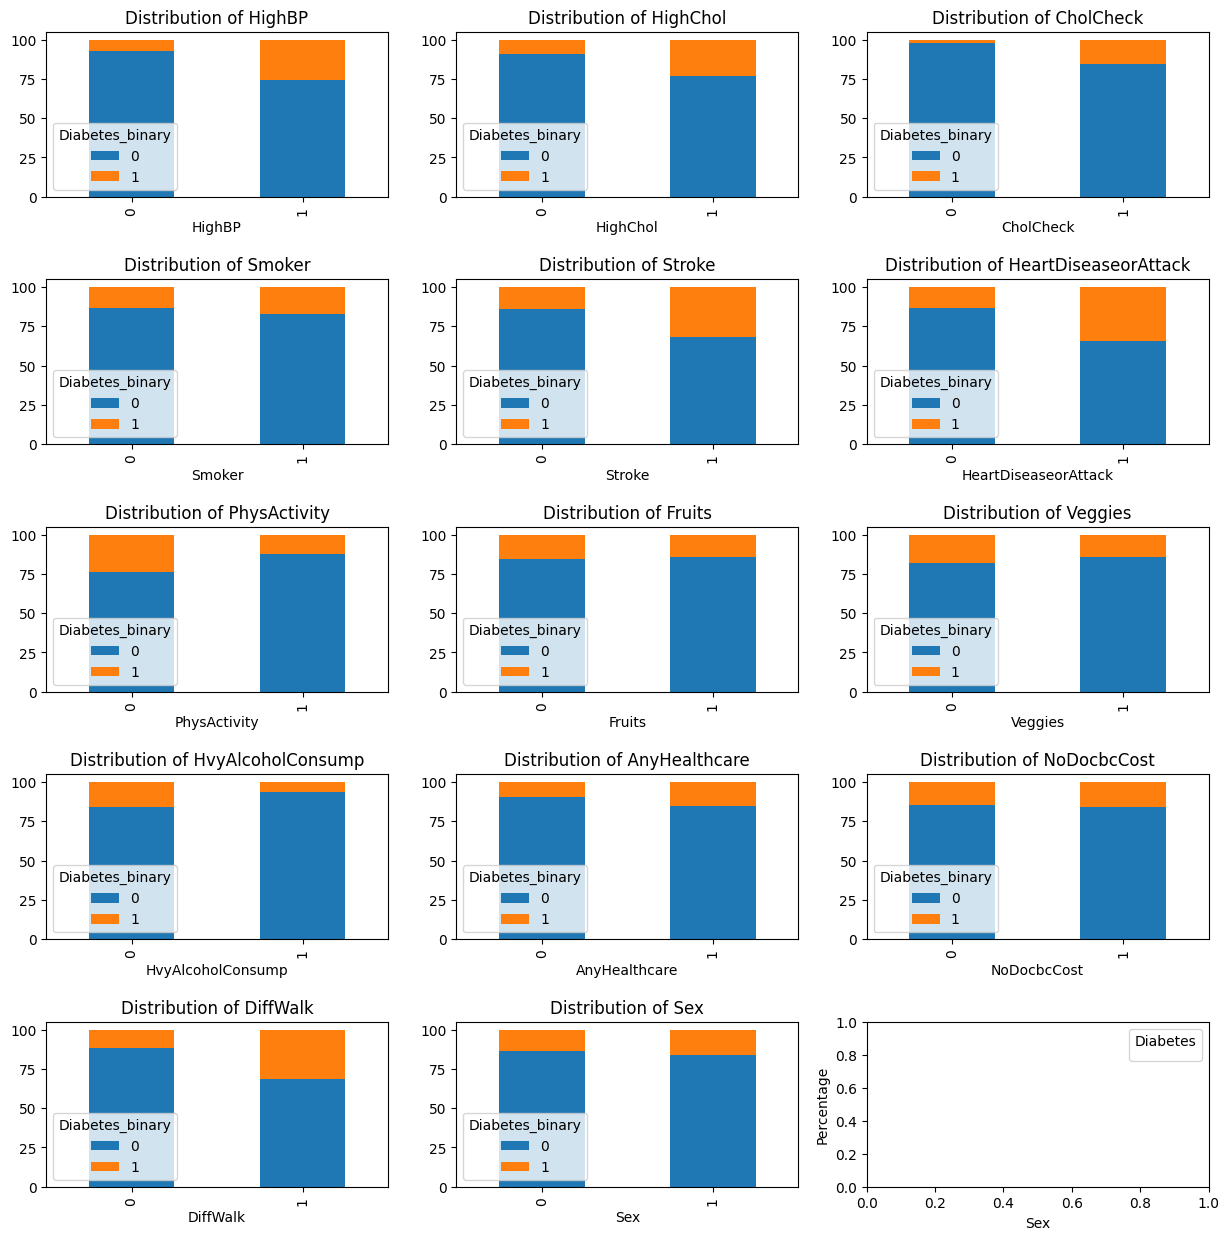

In [ ]:
# Specify the target variable and binary features
target_variable = 'Diabetes_binary'

# Calculate number of subplots needed based on binary features
num_features = len(binary)
num_cols = 3  # Number of columns in subplot grid
num_rows = int(np.ceil(num_features / num_cols))  # Calculate number of rows

# Create a new figure and axis for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Iterate over each binary feature and plot in a subplot
for i, feature in enumerate(binary):
    # Calculate subplot position (row, col) based on index
    row = i // num_cols
    col = i % num_cols

    # Calculate the proportions of 'diabetes' within each category of 'highbp'
    proportions = df.groupby(feature)[target_variable].value_counts(normalize=True).unstack() * 100

    # Plotting a stacked bar plot
    proportions.plot(kind='bar', stacked=True, ax=axes[row,col])
    plt.xlabel(feature)
    plt.ylabel('Percentage')
    axes[row, col].set_title(f'Distribution of {feature}')
    plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
    plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])

# Show the subplot grid
plt.show()

Ingat di sini yang dilihat adalah **proporsinya.** Dari situ dapat dilihat:
*   Orang yang punya riwayat high blood pressure, high cholesterol, stroke, heart disease, dan kesulitan berjalan cenderung memiliki diabetes.
*   Orang yang rajin phyisical activity, makan sayur cenderung tidak kena diabetes.
* Counter-intuitively orang-orang yang gak sering minum alkohol malah lebih banyak yang diabetes



2. Bagaimana tren fitur kategorikal ordinal terhadap target fitur? Contoh: apakah meningkatnya usia prevalensi diabetes juga meningkat?

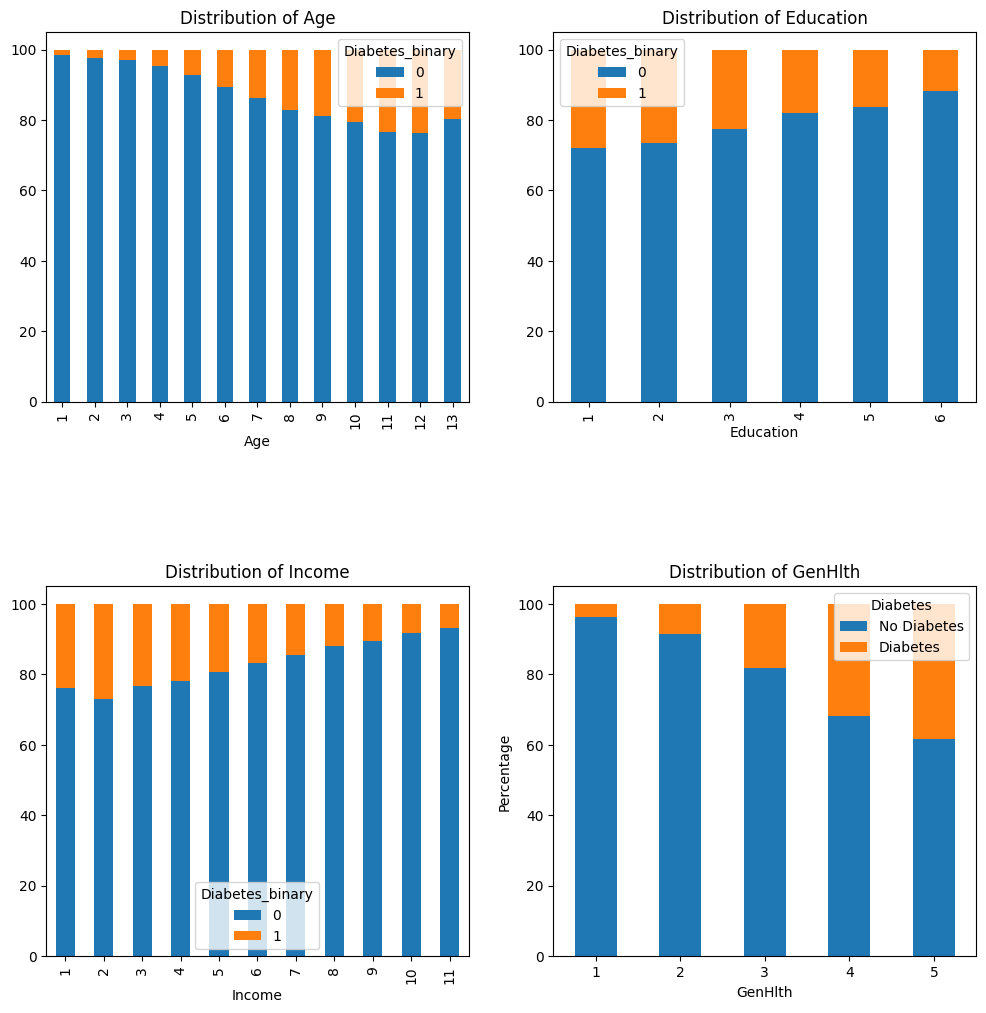

In [ ]:
# Specify the target variable and binary features
target_variable = 'Diabetes_binary'

# Calculate number of subplots needed based on binary features
num_features = len(ordinal)
num_cols = 2  # Number of columns in subplot grid
num_rows = int(np.ceil(num_features / num_cols))  # Calculate number of rows

# Create a new figure and axis for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5)

# Iterate over each binary feature and plot in a subplot
for i, feature in enumerate(ordinal):
    # Calculate subplot position (row, col) based on index
    row = i // num_cols
    col = i % num_cols

    # Calculate the proportions of 'diabetes' within each category of 'highbp'
    proportions = df.groupby(feature)[target_variable].value_counts(normalize=True).unstack() * 100

    # Plotting a stacked bar plot
    proportions.plot(kind='bar', stacked=True, ax=axes[row,col])
    plt.xlabel(feature)
    plt.ylabel('Percentage')
    axes[row, col].set_title(f'Distribution of {feature}')
    plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
    plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])

# Show the subplot grid
plt.show()

Ternyata dari hasil visualisasi didapatkan:
* Semakin tinggi usia, lebih banyak yang kena diabetes. Note: di sini usia dalam bentuk kategori, dan ada 13 kategori yang berurutan dari paling muda (1) sampai paling tua (13).
* Semakin rendah pendidikan dan income, makin banyak juga yang kena diabetes.
* Makin jelek general health (1: bagus, 5: jelek) makin banyak yang kena diabetes

3. Bagaimana tren fitur kontinyu dengan fitur target? Contoh: makin naik BMI apakah makin cenderung diabetes?

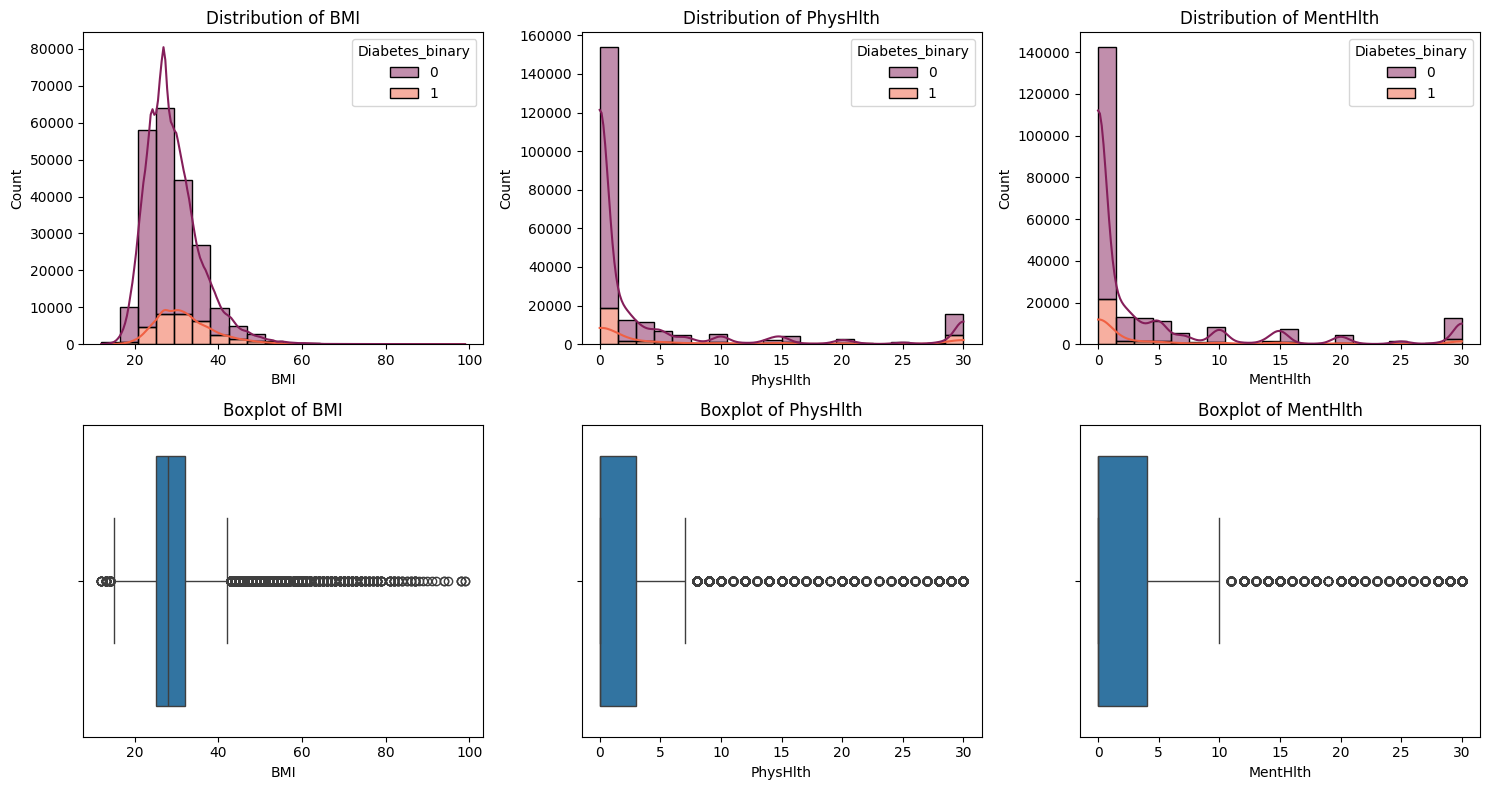

In [ ]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(cont, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df, x=feature, kde=True, bins=20, hue='Diabetes_binary', multiple='stack', palette='rocket')
    plt.title(f'Distribution of {feature}')

    plt.subplot(2, 3, i + 3)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

Bisa dilihat kalau distribusinya emang skewed ke kanan.
Hmm.. mungkin agak sulit diinterpretasikan ya, gimana kalo kita bagi jadi 2? Misal: BMI rangenya dari 0-100 maka dari itu yg low BMI jadi yg BMI < 50 dan yang high BMI > 50. Begitu juga dengan Physical dan Mental Health.

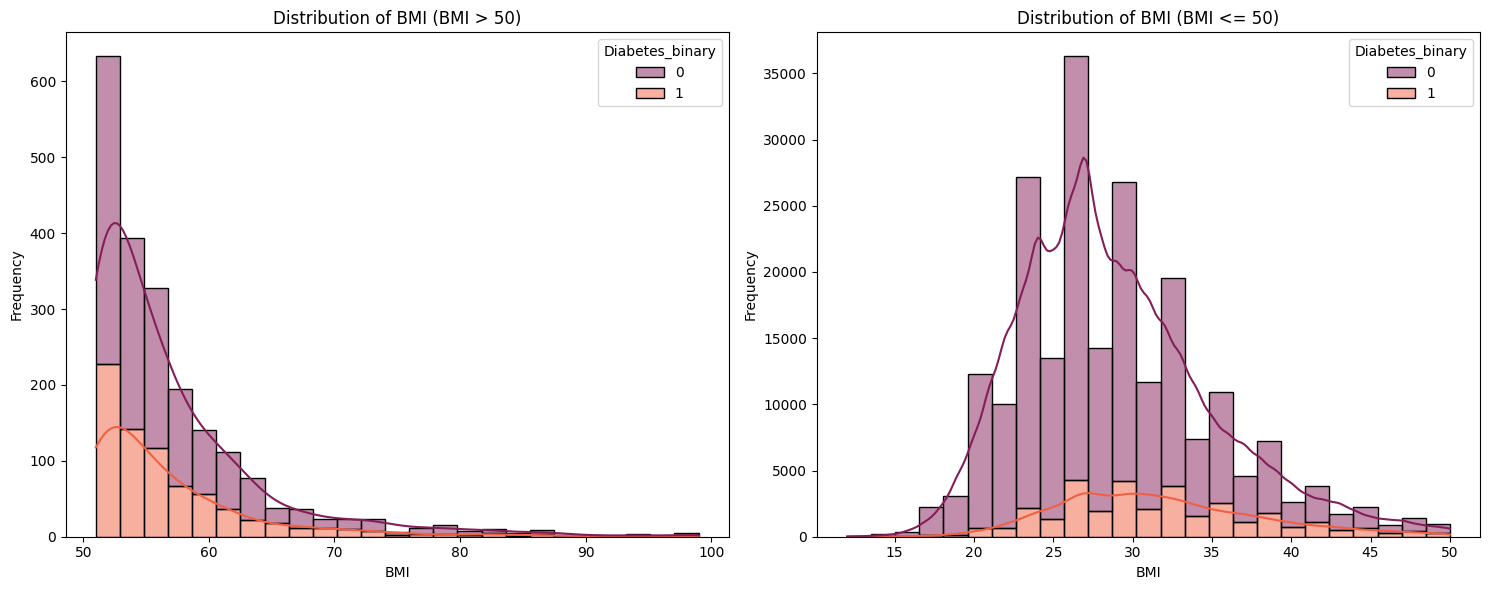

In [ ]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram for BMI > 50
sns.histplot(data=df[df['BMI'] > 50], x='BMI', kde=True, bins=25, hue='Diabetes_binary',
             multiple='stack', palette='rocket', ax=axes[0])
axes[0].set_title('Distribution of BMI (BMI > 50)')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Frequency')

# Plot histogram for BMI <= 50
sns.histplot(data=df[df['BMI'] <= 50], x='BMI', kde=True, bins=25, hue='Diabetes_binary',
             multiple='stack', palette='rocket', ax=axes[1])
axes[1].set_title('Distribution of BMI (BMI <= 50)')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

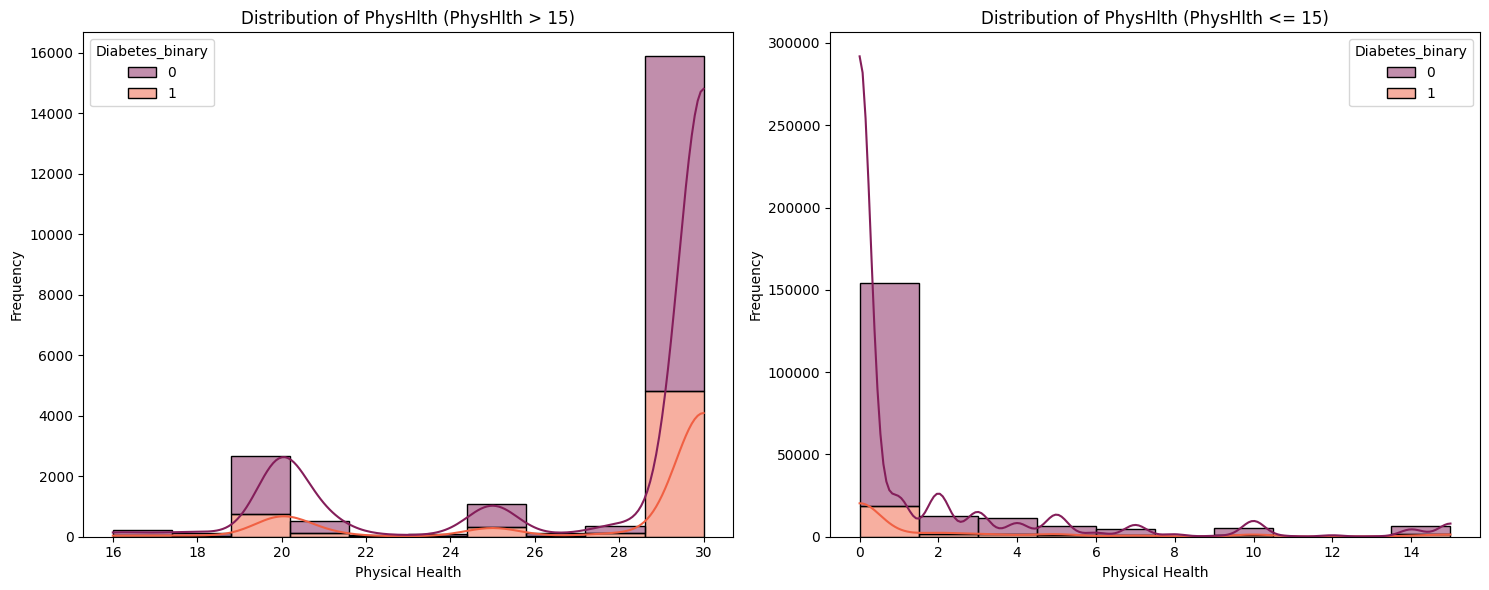

In [ ]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram for BMI > 50
sns.histplot(data=df[df['PhysHlth'] > 15], x='PhysHlth', kde=True, bins=10, hue='Diabetes_binary',
             multiple='stack', palette='rocket', ax=axes[0])
axes[0].set_title('Distribution of PhysHlth (PhysHlth > 15)')
axes[0].set_xlabel('Physical Health')
axes[0].set_ylabel('Frequency')

# Plot histogram for BMI <= 50
sns.histplot(data=df[df['PhysHlth'] <= 15], x='PhysHlth', kde=True, bins=10, hue='Diabetes_binary',
             multiple='stack', palette='rocket', ax=axes[1])
axes[1].set_title('Distribution of PhysHlth (PhysHlth <= 15)')
axes[1].set_xlabel('Physical Health')
axes[1].set_ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

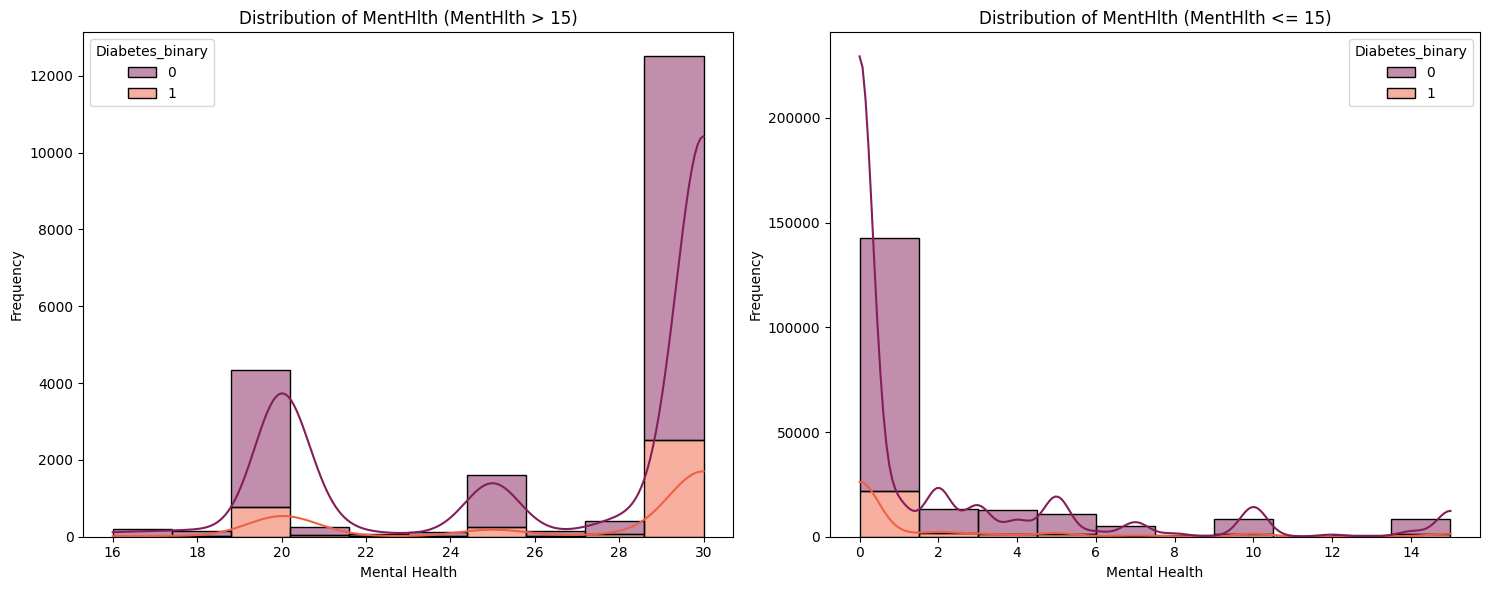

In [ ]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram for BMI > 50
sns.histplot(data=df[df['MentHlth'] > 15], x='MentHlth', kde=True, bins=10, hue='Diabetes_binary',
             multiple='stack', palette='rocket', ax=axes[0])
axes[0].set_title('Distribution of MentHlth (MentHlth > 15)')
axes[0].set_xlabel('Mental Health')
axes[0].set_ylabel('Frequency')

# Plot histogram for BMI <= 50
sns.histplot(data=df[df['MentHlth'] <= 15], x='MentHlth', kde=True, bins=10, hue='Diabetes_binary',
             multiple='stack', palette='rocket', ax=axes[1])
axes[1].set_title('Distribution of MentHlth (MentHlth <= 15)')
axes[1].set_xlabel('Mental Health')
axes[1].set_ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

Insight:
* Orang-orang yang BMI-nya tinggi memang cenderung memiliki diabetes.
* Physical dan Mental health ini distribusinya emang ekstrim, memang lebih banyak yang milih 0 (0 hari memiliki masalah kesehatan fisik maupun mental, dalam arti lain: sehat), tapi ada juga yang milih 30, dan sekalinya milih 30 cenderung diabetes (30 hari memiliki masalah kesehatan fisik maupun mental).

### Correlation Matrix

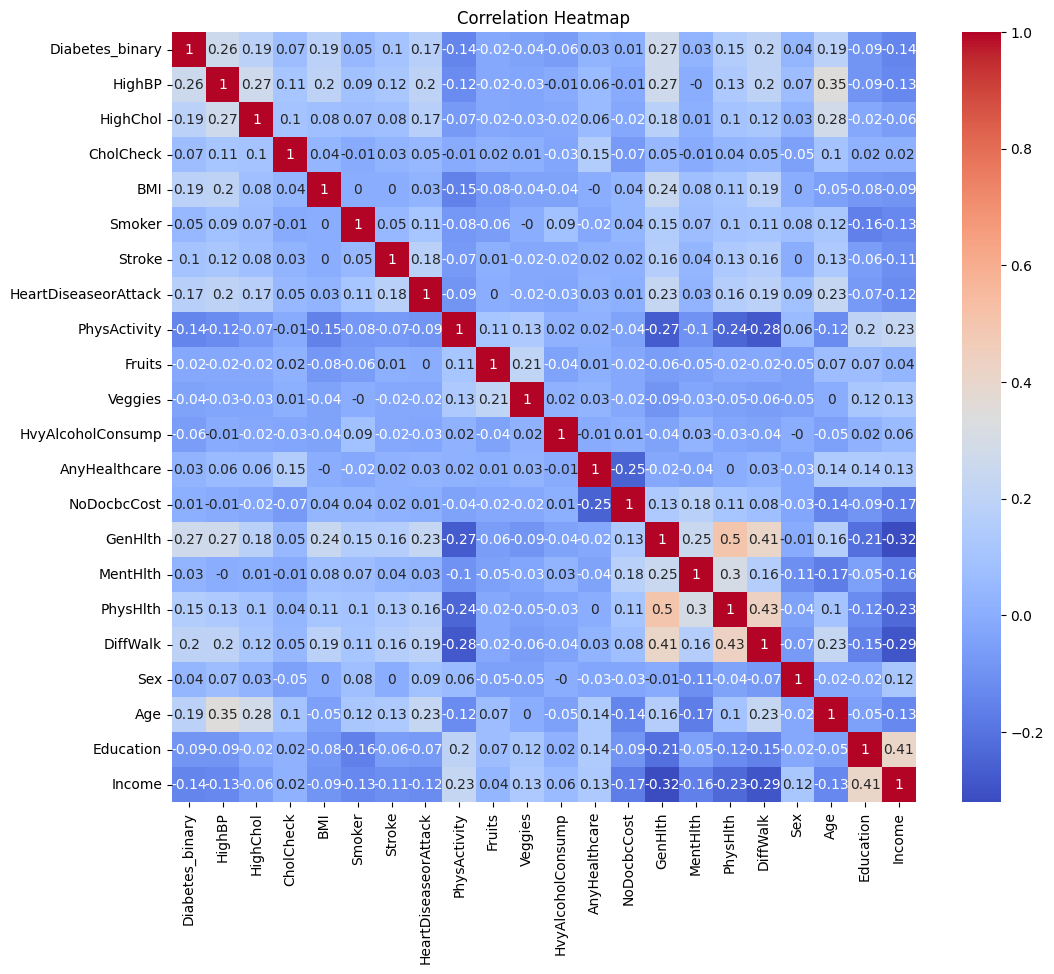

In [ ]:
def create_pearson_correlation(df):
  df_numerical = df.select_dtypes(include=[np.number, bool])

  correlation_matrix = df_numerical.corr().round(2)
  plt.figure(figsize=(12, 10))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
  plt.title('Correlation Heatmap')
  plt.show()

create_pearson_correlation(df)

Insights:
- Ada beberapa fitur yang moderately correlated, tetapi bisa dijelaskan mengapa mereka saling korelasi dan setiap fitur memberikan perspektif yang berbeda terhadap pasien. Maka dari itu, tidak akan di-drop.
- Korelasi ke diabetesnya memang kureng

### Conculsion
1. Distribusi target data imbalanced, kebanyakan fitur kategorikal yang biner pun imbalanced dan hampir constant value. Ada beberapa kolom yang hampir constant value tetapi memberikan insight mengenai tren dengan diabetes (contoh: yg kena stroke kebanyakan juga kena diabetes), sehingga mereka tidak akan di-drop.
2. Orang yang memiliki diabetes cenderung memiliki ciri-ciri: BMI tinggi (badan tidak ideal), memiliki riwayat tekanan darah tinggi, kolesterol, stroke, kesulitan berjalan, dan memiliki keluhan kesehatan baik fisik maupun mental.
3. Beberapa fitur moderately correlated tetapi tidak akan di-drop.

## Feature Selection

Kolom-kolom yang near constant value tetapi tidak memberikan insight yang berarti akan di-drop, yaitu: AnyHealthCare, NoDocbcCost, dan CholCheck

In [10]:
df = df.drop(['AnyHealthcare', 'NoDocbcCost', 'CholCheck'], axis=1)
df.dtypes

Diabetes_binary         int64
HighBP                  int64
HighChol                int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

## Metrics Used

In [11]:
from sklearn.metrics import balanced_accuracy_score, roc_auc_score,f1_score,precision_score,recall_score, classification_report
from sklearn.metrics import confusion_matrix
def cfmatrix(y_test, y_pred):
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

def metrics(y_true, y_pred):

    # Calculate metrics
    metrics_dict = {
        'balanced_accuracy': balanced_accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f1': f1_score(y_true, y_pred, average='weighted'),
        'auc_roc': roc_auc_score(y_true, y_pred, average='weighted')
    }

    print(pd.Series(metrics_dict))

## Machine Learning

### Split & Resample Data

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop(['Diabetes_binary'], axis=1)
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 92)

In [13]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train,y_train)

In [ ]:
# from imblearn.over_sampling import SMOTE

# # Instantiate SMOTE (Synthetic Minority Over-sampling Technique)
# smote = SMOTE(random_state=42)

# # Resample the dataset using SMOTE
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

### Logistic Regression

Metrics for Train Dataset
balanced_accuracy    0.731285
precision            0.731655
recall               0.731285
f1                   0.731177
auc_roc              0.731285
dtype: float64

Metrics for Test Dataset
balanced_accuracy    0.734116
precision            0.849197
recall               0.720912
f1                   0.758537
auc_roc              0.734116
dtype: float64

Classification Report & Confusion Matrix
              precision    recall  f1-score   support

           0       0.94      0.72      0.81     37970
           1       0.32      0.75      0.45      6679

    accuracy                           0.72     44649
   macro avg       0.63      0.73      0.63     44649
weighted avg       0.85      0.72      0.76     44649



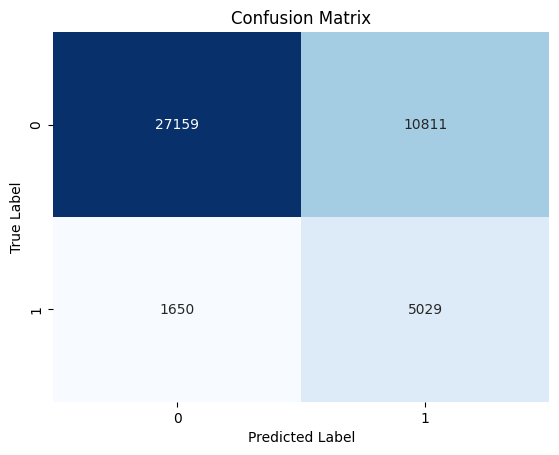

In [15]:
from sklearn.linear_model import LogisticRegression

# Fitting
logreg = LogisticRegression(max_iter = 7600)
logreg.fit(X_resampled, y_resampled)

# Prediction
y_pred_train = logreg.predict(X_resampled)
y_pred_test = logreg.predict(X_test)

# Evaluation
print("Metrics for Train Dataset")
metrics(y_resampled, y_pred_train)
print("\nMetrics for Test Dataset")
metrics(y_test, y_pred_test)
print("\nClassification Report & Confusion Matrix")
cfmatrix(y_test, y_pred_test)

Ada 2 cara untuk lihat skor ini, F1 score untuk data mayoritas (0) dan F1 score untuk data minoritas (1). Bisa dilihat karena emang keterbatasan data, jadi F1 score untuk data minoritas itu sangat kecil, sementara F1 untuk data mayoritas udah bagus. Jadi apakah adil untuk menilai performa model dari F1 kelas minoritas? Idk it depends. Untuk melihat performa model **overall** dipakailah macro dan weighted average.

False positive-nya tinggi, makanya precisionnya jelek dan ngaruh ke F1 scorenya. Dilihat dari AUC dia bisa membedakan antara kelas negatif dan kelas positif lebih baik daripada random chance.

### Random Forest

Metrics for Train Dataset
balanced_accuracy    0.997342
precision            0.997343
recall               0.997342
f1                   0.997342
auc_roc              0.997342
dtype: float64

Metrics for Test Dataset
balanced_accuracy    0.716511
precision            0.843000
recall               0.692334
f1                   0.735273
auc_roc              0.716511
dtype: float64

Classification Report & Confusion Matrix
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     37970
           1       0.29      0.75      0.42      6679

    accuracy                           0.69     44649
   macro avg       0.62      0.72      0.61     44649
weighted avg       0.84      0.69      0.74     44649



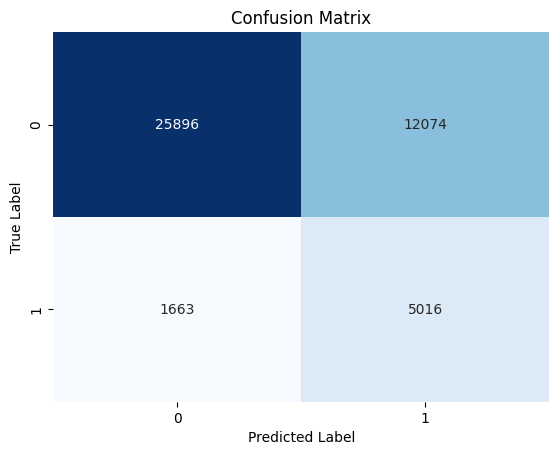

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Fitting
randomforest = RandomForestClassifier()
randomforest.fit(X_resampled, y_resampled)

# Prediction
y_pred_train = randomforest.predict(X_resampled)
y_pred_test = randomforest.predict(X_test)

# Evaluation
print("Metrics for Train Dataset")
metrics(y_resampled, y_pred_train)
print("\nMetrics for Test Dataset")
metrics(y_test, y_pred_test)
print("\nClassification Report & Confusion Matrix")
cfmatrix(y_test, y_pred_test)

Terlihat jelas bahwa model ini overfit, selain itu dia juga false positivenya banyak.

### Catboost

Metrics for Train Dataset
balanced_accuracy    0.766844
precision            0.768822
recall               0.766844
f1                   0.766414
auc_roc              0.766844
dtype: float64

Metrics for Test Dataset
balanced_accuracy    0.736478
precision            0.851656
recall               0.705727
f1                   0.746609
auc_roc              0.736478
dtype: float64

Classification Report & Confusion Matrix
              precision    recall  f1-score   support

           0       0.95      0.69      0.80     37970
           1       0.31      0.78      0.44      6679

    accuracy                           0.71     44649
   macro avg       0.63      0.74      0.62     44649
weighted avg       0.85      0.71      0.75     44649



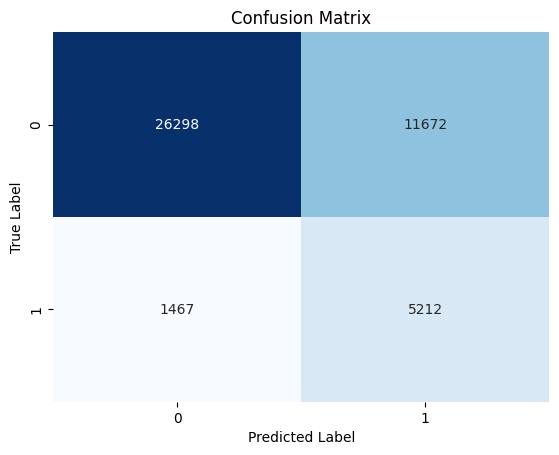

In [17]:
from catboost import CatBoostClassifier

# Fitting
catboost = CatBoostClassifier(verbose=0)
catboost.fit(X_resampled, y_resampled)

# Prediction
y_pred_train = catboost.predict(X_resampled)
y_pred_test = catboost.predict(X_test)

# Evaluation
print("Metrics for Train Dataset")
metrics(y_resampled, y_pred_train)
print("\nMetrics for Test Dataset")
metrics(y_test, y_pred_test)
print("\nClassification Report & Confusion Matrix")
cfmatrix(y_test, y_pred_test)

Metrics for Train Dataset
balanced_accuracy    0.766844
precision            0.768822
recall               0.766844
f1                   0.766414
auc_roc              0.766844
dtype: float64

Metrics for Test Dataset
balanced_accuracy    0.736478
precision            0.851656
recall               0.705727
f1                   0.746609
auc_roc              0.736478
dtype: float64
              precision    recall  f1-score   support

           0       0.95      0.69      0.80     37970
           1       0.31      0.78      0.44      6679

    accuracy                           0.71     44649
   macro avg       0.63      0.74      0.62     44649
weighted avg       0.85      0.71      0.75     44649



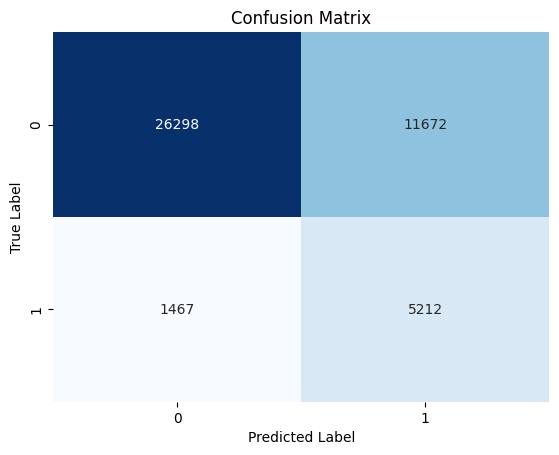

In [21]:
# Evaluation
print("Metrics for Train Dataset")
metrics(y_resampled, y_pred_train)
print("\nMetrics for Test Dataset")
metrics(y_test, y_pred_test)
cfmatrix(y_test, y_pred_test)

Tidak terlihat overfit tapi dia false positive lagi.

### XGBoost

Metrics for Train Dataset
balanced_accuracy    0.776969
precision            0.778841
recall               0.776969
f1                   0.776594
auc_roc              0.776969
dtype: float64

Metrics for Test Dataset
balanced_accuracy    0.733010
precision            0.850291
recall               0.702031
f1                   0.743543
auc_roc              0.733010
dtype: float64
              precision    recall  f1-score   support

           0       0.95      0.69      0.80     37970
           1       0.31      0.78      0.44      6679

    accuracy                           0.70     44649
   macro avg       0.63      0.73      0.62     44649
weighted avg       0.85      0.70      0.74     44649



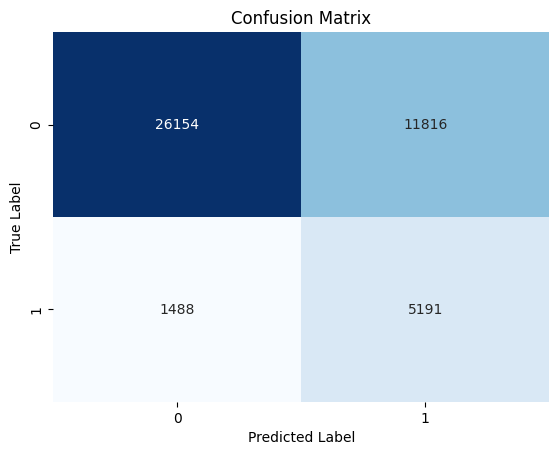

In [18]:
from xgboost import XGBClassifier

# Fitting
xgboost = XGBClassifier()
xgboost.fit(X_resampled, y_resampled)

# Predicting
y_pred_train = xgboost.predict(X_resampled)
y_pred_test = xgboost.predict(X_test)

# Evaluation
print("Metrics for Train Dataset")
metrics(y_resampled, y_pred_train)
print("\nMetrics for Test Dataset")
metrics(y_test, y_pred_test)
cfmatrix(y_test, y_pred_test)

Ini juga banyak false positivenya.

## Hyperparameter Tuning

Salah satu cara untuk meningkatkan performa dan mencegah overfitting. Hyperparameter tuning ini gunanya untuk mencari parameter terbaik untuk dimasukkan ke ML model sehingga scorenya meningkat.

Hyperparameter tuning itu ada banyak jenisnya, ada RandomSearch, GridSearch dan BayesianSearch. Perlu diingat tahap ini memang memory consumptive karena tiap parameter akan dicoba untuk lihat kombinasi mana yang paling bagus.

Maka dari itu: yg sabar y bang

### Logistic Regression

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = LogisticRegression(max_iter=10000)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1], # Penalty berapa yang paling bagus?
    'solver': ['lbfgs', 'sag', 'saga'] # Solver mana yang paling bagus?
}

# Initialize GridSearchCV with resampled data and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1') # Cari parameter yg meningkatkan nilai f1 score
grid_search.fit(X_resampled, y_resampled)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'solver': 'saga'}


Metrics for Train Dataset
balanced_accuracy    0.731341
precision            0.731715
recall               0.731341
f1                   0.731232
auc_roc              0.731341
dtype: float64

Metrics for Test Dataset
balanced_accuracy    0.733923
precision            0.849121
recall               0.720688
f1                   0.758354
auc_roc              0.733923
dtype: float64
              precision    recall  f1-score   support

           0       0.94      0.72      0.81     37970
           1       0.32      0.75      0.45      6679

    accuracy                           0.72     44649
   macro avg       0.63      0.73      0.63     44649
weighted avg       0.85      0.72      0.76     44649



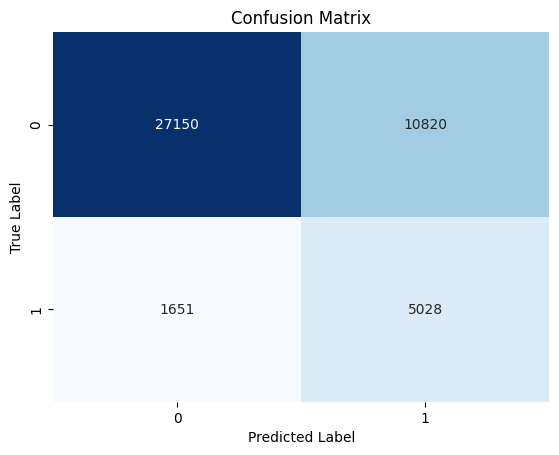

In [19]:
# Fitting
logreg = LogisticRegression(max_iter = 10000, C=1, solver='saga')
logreg.fit(X_resampled, y_resampled)

# Prediction
y_pred_train = logreg.predict(X_resampled)
y_pred_test = logreg.predict(X_test)

# Evaluation
print("Metrics for Train Dataset")
metrics(y_resampled, y_pred_train)
print("\nMetrics for Test Dataset")
metrics(y_test, y_pred_test)
cfmatrix(y_test, y_pred_test)

Sejujurnya ini bedanya gak jauh-jauh dari sebelum di-hypertune.

### Random Forest

In [26]:
# Define the model
model = RandomForestClassifier()

# Define the parameter grid
# Untuk RandomForest ini kita memiliki tugas yang lebih penting: gimana biar gak overfit?
param_grid = {
    'max_depth': [15, 20, 25, 30],
    'max_leaf_nodes': [50, 75, 100, 150],
    'min_samples_split': [50, 100, 200, 400]
}

# Initialize GridSearchCV with resampled data and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1') # Cari parameter yg meningkatkan nilai f1 score
grid_search.fit(X_resampled, y_resampled)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 15, 'max_leaf_nodes': 150, 'min_samples_split': 50}


Metrics for Train Dataset
balanced_accuracy    0.743375
precision            0.745641
recall               0.743375
f1                   0.742782
auc_roc              0.743375
dtype: float64

Metrics for Test Dataset
balanced_accuracy    0.735337
precision            0.851505
recall               0.701583
f1                   0.743251
auc_roc              0.735337
dtype: float64
              precision    recall  f1-score   support

           0       0.95      0.69      0.80     37970
           1       0.31      0.78      0.44      6679

    accuracy                           0.70     44649
   macro avg       0.63      0.74      0.62     44649
weighted avg       0.85      0.70      0.74     44649



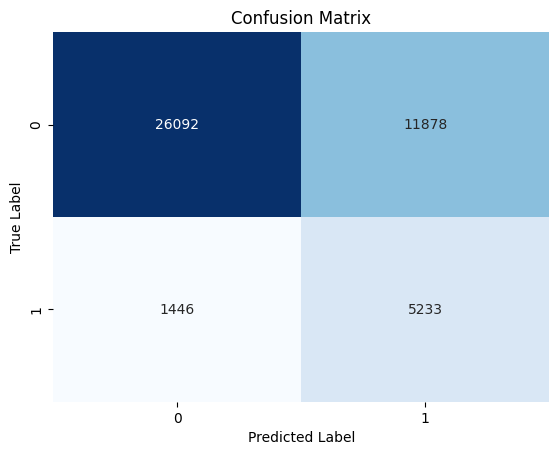

In [20]:
# Fitting
randomforest = RandomForestClassifier(max_depth=15, max_leaf_nodes=150, min_samples_split=50)
randomforest.fit(X_resampled, y_resampled)

# Prediction
y_pred_train = randomforest.predict(X_resampled)
y_pred_test = randomforest.predict(X_test)

# Evaluation
print("Metrics for Train Dataset")
metrics(y_resampled, y_pred_train)
print("\nMetrics for Test Dataset")
metrics(y_test, y_pred_test)
cfmatrix(y_test, y_pred_test)

Ini keliatan langsung sih kalau dia udah gak overfitting lagi, selain itu FALSE NEGATIVENYA TURUN 🗣

### Catboost

Yang ini pake RandomSearchCV karena kesabaran saya tipis

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the CatBoostClassifier model
model = CatBoostClassifier(verbose=0)

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'iterations': randint(100, 500),  # Number of boosting iterations (trees)
    'learning_rate': uniform(0.01, 0.3),  # Step size shrinkage used in update rule
    'depth': randint(4, 10),  # Depth of trees
    'l2_leaf_reg': uniform(1, 10)  # L2 regularization coefficient
}

# Initialize RandomizedSearchCV with CatBoostClassifier model and parameter distributions
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)

# Perform randomized search on the training data
random_search.fit(X_resampled, y_resampled)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'depth': 6, 'iterations': 187, 'l2_leaf_reg': 4.337086111390218, 'learning_rate': 0.05286004537658223}


Metrics for Train Dataset
balanced_accuracy    0.741241
precision            0.743181
recall               0.741241
f1                   0.740724
auc_roc              0.741241
dtype: float64

Metrics for Test Dataset
balanced_accuracy    0.740185
precision            0.853192
recall               0.708885
f1                   0.749250
auc_roc              0.740185
dtype: float64
              precision    recall  f1-score   support

           0       0.95      0.70      0.80     37970
           1       0.31      0.78      0.45      6679

    accuracy                           0.71     44649
   macro avg       0.63      0.74      0.62     44649
weighted avg       0.85      0.71      0.75     44649



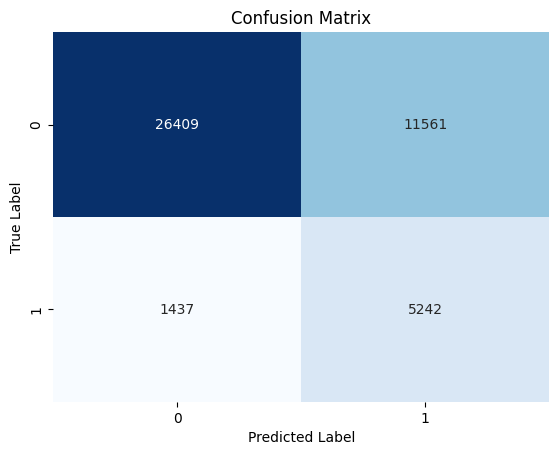

In [21]:
# Fitting
catboost = CatBoostClassifier(verbose=0, depth=6, iterations=187, l2_leaf_reg=4.337086111390218, learning_rate=0.05286004537658223)
catboost.fit(X_resampled, y_resampled)

# Prediction
y_pred_train = catboost.predict(X_resampled)
y_pred_test = catboost.predict(X_test)

# Evaluation
print("Metrics for Train Dataset")
metrics(y_resampled, y_pred_train)
print("\nMetrics for Test Dataset")
metrics(y_test, y_pred_test)
cfmatrix(y_test, y_pred_test)

### XGBoost

In [28]:
# Define the model
model = XGBClassifier()

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'learning_rate': uniform(0.01, 0.3),  # Step size shrinkage used in update rule
    'max_depth': randint(3, 10),  # Maximum depth of a tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition
}

# Initialize RandomizedSearchCV with CatBoostClassifier model and parameter distributions
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)

# Perform randomized search on the training data
random_search.fit(X_resampled, y_resampled)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'gamma': 0, 'learning_rate': 0.19524445288831496, 'max_depth': 4}


Metrics for Train Dataset
balanced_accuracy    0.745564
precision            0.747577
recall               0.745564
f1                   0.745046
auc_roc              0.745564
dtype: float64

Metrics for Test Dataset
balanced_accuracy    0.737148
precision            0.852013
recall               0.705503
f1                   0.746450
auc_roc              0.737148
dtype: float64
              precision    recall  f1-score   support

           0       0.95      0.69      0.80     37970
           1       0.31      0.78      0.44      6679

    accuracy                           0.71     44649
   macro avg       0.63      0.74      0.62     44649
weighted avg       0.85      0.71      0.75     44649



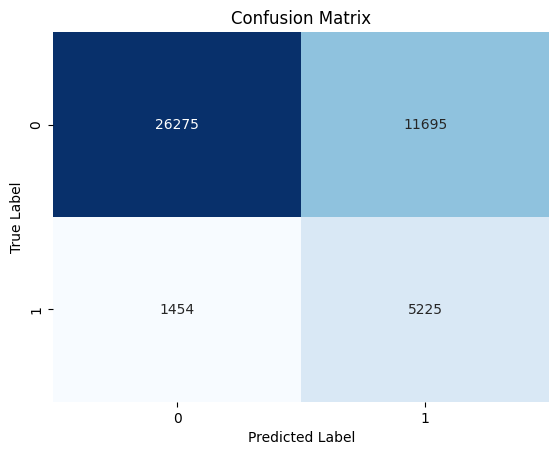

In [22]:
# Fitting
xgboost = XGBClassifier(gamma=0, learning_rate=0.19524445288831496, max_depth=4)
xgboost.fit(X_resampled, y_resampled)

# Predicting
y_pred_train = xgboost.predict(X_resampled)
y_pred_test = xgboost.predict(X_test)

# Evaluation
print("Metrics for Train Dataset")
metrics(y_resampled, y_pred_train)
print("\nMetrics for Test Dataset")
metrics(y_test, y_pred_test)
cfmatrix(y_test, y_pred_test)

False negative turun tetapi false positivenya naik.

## Cross Validation

Salah satu cara untuk menilai performa machine learning. Train split dari data akan dibagi ke dalam k-fold, kemudian dari k-fold tersebut yang train dan test akan di-shuffle. Hal ini untuk "meratakan" data sehingga idealnya ML model bisa generalisir data dgn baik.

Selain itu, karena data kita imbalanced, kita pakenya stratified k-fold corss val yang memastikan persebaran target variable di masing-masing fold itu rata.

In [33]:
# Define the models
models = {
    'Logistic Regression': logreg,
    'Random Forest': randomforest,
    'XGBoost': xgboost,
    'CatBoost': catboost
}

from sklearn.model_selection import StratifiedKFold
def stratified_kfold_cv(X, y, models, n_splits=5):
    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    for model_name, model in models.items():
        print(f"Training and evaluating {model_name}...")
        accuracy_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []

        for train_idx, val_idx in skf.split(X, y):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            # Fit the model on the training data
            model.fit(X_train, y_train)

            # Predict on the validation data
            y_pred = model.predict(X_val)

            # Calculate evaluation metrics
            accuracy = balanced_accuracy_score(y_val, y_pred)
            precision = precision_score(y_val, y_pred, average='weighted')
            recall = recall_score(y_val, y_pred, average='weighted')
            f1 = f1_score(y_val, y_pred, average='weighted')

            accuracy_scores.append(accuracy)
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)

        # Compute average metrics over all folds
        results['Model'].append(model_name)
        results['Accuracy'].append(np.mean(accuracy_scores))
        results['Precision'].append(np.mean(precision_scores))
        results['Recall'].append(np.mean(recall_scores))
        results['F1 Score'].append(np.mean(f1_scores))

    # Create DataFrame from results
    results_df = pd.DataFrame(results)
    return results_df

# Call the stratified_kfold_cv function
cv_results = stratified_kfold_cv(X, y, models, n_splits=5)

# Display the cross-validation results
print("\nCross-Validation Results:")
print(cv_results)

Training and evaluating Logistic Regression...
Training and evaluating Random Forest...
Training and evaluating XGBoost...
Training and evaluating CatBoost...

Cross-Validation Results:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.562687   0.818547  0.853863  0.816382
1        Random Forest  0.534553   0.822778  0.854741  0.803592
2              XGBoost  0.566069   0.823410  0.856027  0.818748
3             CatBoost  0.562835   0.822537  0.855709  0.817269


Wow kok jadi bagus ya... I'M NOT COMPLAINING I'M JUST CONFUSED.

## Feature Importance

Untuk melihat fitur-fitur mana saja yang menurut si ML model itu paling penting untuk memprediksi diabetes. (Ciri-ciri orang yang kena diabetes, apakah sesuai dengan hasil EDA di atas?)

In [30]:
feature_names = X.columns

# Pair feature names with coefficients
feature_importance_lr = dict(zip(feature_names, logreg.coef_[0]))
# Pair feature names with importances
feature_importance_rf = dict(zip(feature_names, randomforest.feature_importances_))
# Pair feature names with importances
feature_importance_xgb = dict(zip(feature_names, xgboost.feature_importances_))
# Pair feature names with importances
feature_importance_catboost = dict(zip(feature_names, catboost.get_feature_importance()))

# Create a list of tuples (model_name, feature_importances) for sorting
models_importances = [
    ('Logistic Regression', feature_importance_lr),
    ('Random Forest', feature_importance_rf),
    ('XGBoost', feature_importance_xgb),
    ('CatBoost', feature_importance_catboost)
]

# Sort feature importances for each model and print
for model_name, feature_importances in models_importances:
    sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
    print(f"{model_name} Feature Importances:")
    for feature, importance in sorted_importances:
        print(f"{feature}: {importance:.4f}")
    print()

Logistic Regression Feature Importances:
HighBP: 0.6966
HighChol: 0.5990
GenHlth: 0.4966
HeartDiseaseorAttack: 0.3077
Sex: 0.3041
Stroke: 0.1947
Age: 0.1517
DiffWalk: 0.1151
BMI: 0.0618
Veggies: 0.0179
PhysHlth: -0.0035
MentHlth: -0.0075
Fruits: -0.0227
Education: -0.0387
Income: -0.0445
Smoker: -0.1038
PhysActivity: -0.1616
HvyAlcoholConsump: -0.7024

Random Forest Feature Importances:
HighBP: 0.2371
GenHlth: 0.2211
Age: 0.1539
HighChol: 0.1039
BMI: 0.0982
DiffWalk: 0.0578
HeartDiseaseorAttack: 0.0310
Income: 0.0223
PhysActivity: 0.0181
PhysHlth: 0.0168
HvyAlcoholConsump: 0.0101
MentHlth: 0.0092
Sex: 0.0076
Education: 0.0064
Stroke: 0.0034
Smoker: 0.0012
Fruits: 0.0010
Veggies: 0.0010

XGBoost Feature Importances:
HighBP: 0.6215
HighChol: 0.0865
GenHlth: 0.0828
Age: 0.0386
DiffWalk: 0.0318
HvyAlcoholConsump: 0.0287
HeartDiseaseorAttack: 0.0272
BMI: 0.0172
Sex: 0.0139
PhysActivity: 0.0135
Income: 0.0076
Stroke: 0.0071
Smoker: 0.0051
MentHlth: 0.0050
Education: 0.0044
Veggies: 0.0034
Ph